Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import save
from numpy import load
from sklearn.metrics import classification_report,confusion_matrix

Load data as numpy

In [2]:
X_train = load(r'D:\Year3\Computer Intelligence\Project\X_train_80.npy')
y_train = load(r'D:\Year3\Computer Intelligence\Project\y_train_80.npy')

X_test = load(r'D:\Year3\Computer Intelligence\Project\X_test_80.npy')
y_test = load(r'D:\Year3\Computer Intelligence\Project\y_test_80.npy')

X_val = load(r'D:\Year3\Computer Intelligence\Project\X_val_80.npy')
y_val = load(r'D:\Year3\Computer Intelligence\Project\y_val_80.npy')

Display shape of data

In [3]:
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("X_val Shape :", X_val.shape)
print("y_train Shape :", y_train.shape)
print("y_test Shape :", y_test.shape)
print("y_val Shape :", y_val.shape)

X_train Shape : (4000, 48, 64)
X_test Shape : (500, 48, 64)
X_val Shape : (500, 48, 64)
y_train Shape : (4000,)
y_test Shape : (500,)
y_val Shape : (500,)


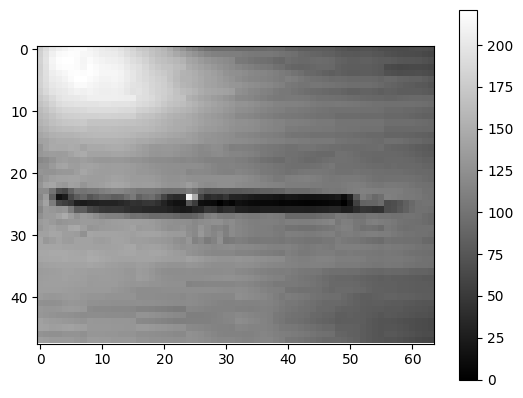

In [5]:
# display sample image 
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
y_train[0]

2

In [7]:
X_train[0]

array([[178, 190, 202, ...,  68,  67,  65],
       [181, 195, 208, ...,  65,  63,  61],
       [183, 197, 212, ...,  73,  70,  68],
       ...,
       [140, 139, 137, ...,  66,  65,  64],
       [127, 126, 125, ...,  68,  66,  66],
       [137, 135, 133, ...,  64,  62,  61]], dtype=uint8)

Normalise data to be in a range of 0-1

In [4]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

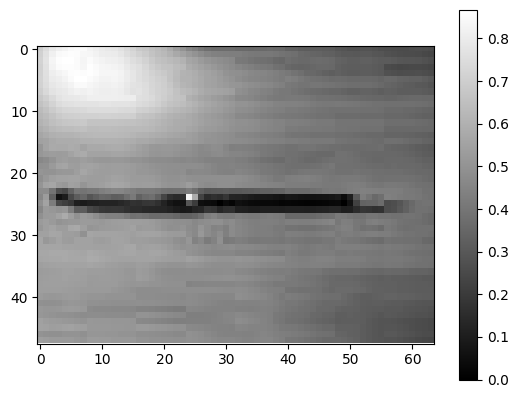

In [9]:
# check the range of the image 
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Define a list of class names

In [10]:
X_train[0]

array([[0.69803922, 0.74509804, 0.79215686, ..., 0.26666667, 0.2627451 ,
        0.25490196],
       [0.70980392, 0.76470588, 0.81568627, ..., 0.25490196, 0.24705882,
        0.23921569],
       [0.71764706, 0.77254902, 0.83137255, ..., 0.28627451, 0.2745098 ,
        0.26666667],
       ...,
       [0.54901961, 0.54509804, 0.5372549 , ..., 0.25882353, 0.25490196,
        0.25098039],
       [0.49803922, 0.49411765, 0.49019608, ..., 0.26666667, 0.25882353,
        0.25882353],
       [0.5372549 , 0.52941176, 0.52156863, ..., 0.25098039, 0.24313725,
        0.23921569]])

Since images are in grayscale, add the channel

In [5]:
# add grayscale channel
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]
X_val = X_val[...,np.newaxis]

In [6]:
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("X_val Shape :", X_val.shape)

X_train Shape : (4000, 48, 64, 1)
X_test Shape : (500, 48, 64, 1)
X_val Shape : (500, 48, 64, 1)


In [7]:
class_name = ['Eraser','Notebook','Pen','Scissors','Tape']
class_name[y_train[0]]

'Pen'

### CNN model 1 - with extra layer of conv2D and max pooling and set dropouts = 0.3

In [14]:
model = tf.keras.Sequential()

# (neurons, kernel, )
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,64,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #Convert our 3D feature maps into 1D feature vectors

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 8, 256)         2

In [19]:
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_val, y_val))

Epoch 1/15
125/125 [==============================] - 20s 164ms/step - loss: 1.5864 - accuracy: 0.2517 - val_loss: 1.4765 - val_accuracy: 0.3520
Epoch 2/15
125/125 [==============================] - 21s 167ms/step - loss: 1.3451 - accuracy: 0.4507 - val_loss: 1.1761 - val_accuracy: 0.5380
Epoch 3/15
125/125 [==============================] - 21s 164ms/step - loss: 1.1102 - accuracy: 0.5535 - val_loss: 0.9525 - val_accuracy: 0.6380
Epoch 4/15
125/125 [==============================] - 22s 175ms/step - loss: 0.9067 - accuracy: 0.6545 - val_loss: 0.8407 - val_accuracy: 0.6980
Epoch 5/15
125/125 [==============================] - 21s 166ms/step - loss: 0.7408 - accuracy: 0.7253 - val_loss: 0.6675 - val_accuracy: 0.7640
Epoch 6/15
125/125 [==============================] - 20s 163ms/step - loss: 0.6106 - accuracy: 0.7780 - val_loss: 0.6406 - val_accuracy: 0.7680
Epoch 7/15
125/125 [==============================] - 18s 146ms/step - loss: 0.5200 - accuracy: 0.8145 - val_loss: 0.5508 - val_ac

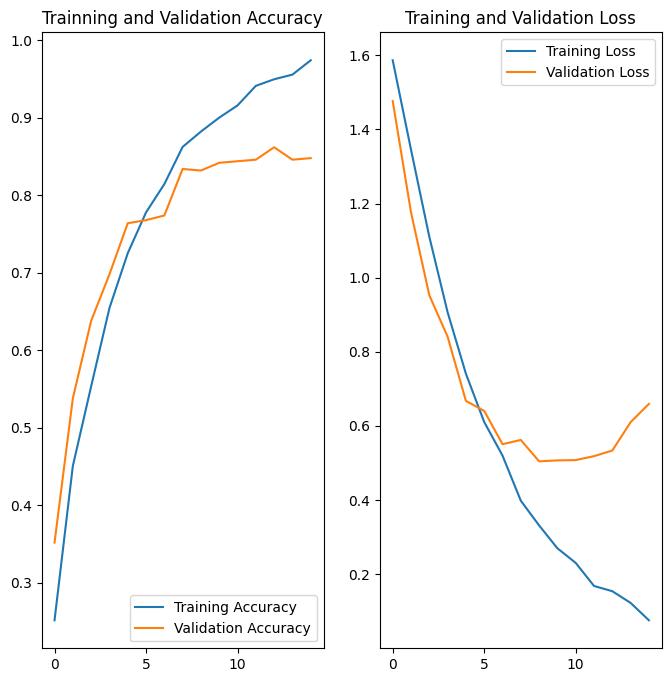

In [20]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(15) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [21]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 1s 33ms/step - loss: 0.7832 - accuracy: 0.8320


[0.7832443118095398, 0.8320000171661377]

Train with epoch=9

In [16]:

hist=model.fit(X_train,y_train,epochs=9,validation_data=(X_val, y_val))

Epoch 1/9
125/125 [==============================] - 19s 151ms/step - loss: 1.5629 - accuracy: 0.2715 - val_loss: 1.3623 - val_accuracy: 0.4400
Epoch 2/9
125/125 [==============================] - 18s 141ms/step - loss: 1.3150 - accuracy: 0.4613 - val_loss: 1.1660 - val_accuracy: 0.5320
Epoch 3/9
125/125 [==============================] - 16s 131ms/step - loss: 1.1167 - accuracy: 0.5642 - val_loss: 0.8993 - val_accuracy: 0.6660
Epoch 4/9
125/125 [==============================] - 16s 131ms/step - loss: 0.9028 - accuracy: 0.6570 - val_loss: 0.8169 - val_accuracy: 0.7100
Epoch 5/9
125/125 [==============================] - 17s 136ms/step - loss: 0.7302 - accuracy: 0.7270 - val_loss: 0.6588 - val_accuracy: 0.7800
Epoch 6/9
125/125 [==============================] - 17s 135ms/step - loss: 0.6106 - accuracy: 0.7843 - val_loss: 0.6056 - val_accuracy: 0.7840
Epoch 7/9
125/125 [==============================] - 17s 137ms/step - loss: 0.4886 - accuracy: 0.8238 - val_loss: 0.5180 - val_accuracy:

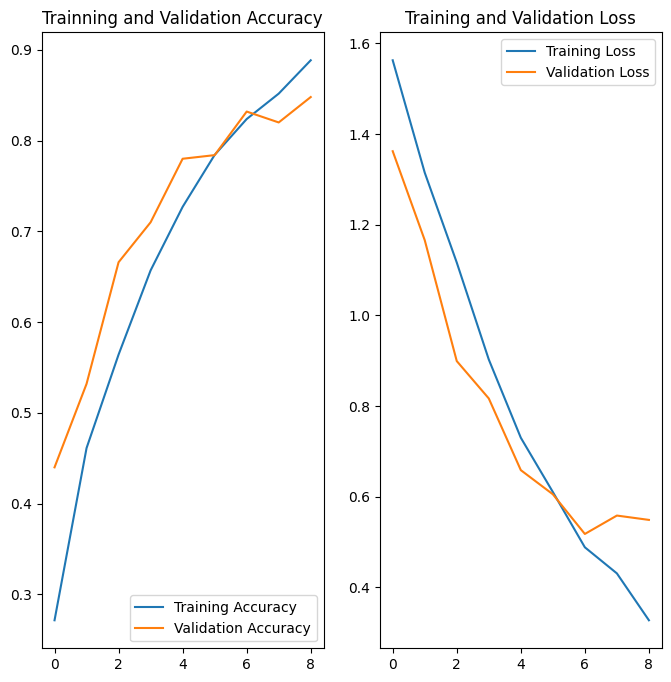

In [19]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(9) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [20]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 1s 32ms/step - loss: 0.5385 - accuracy: 0.8280


[0.5385470390319824, 0.828000009059906]

In [21]:
test_predictions_ = model.predict(X_test)
test_predictions = np.argmax(test_predictions_, axis=1)
test_predictions

array([4, 3, 0, 4, 1, 2, 1, 1, 1, 1, 3, 3, 0, 0, 1, 2, 3, 1, 3, 3, 4, 4,
       0, 3, 1, 1, 3, 1, 0, 3, 4, 3, 3, 2, 0, 0, 0, 0, 0, 4, 1, 0, 0, 2,
       1, 2, 3, 2, 2, 4, 3, 2, 1, 1, 3, 3, 2, 4, 4, 0, 2, 4, 3, 3, 4, 1,
       3, 0, 3, 3, 3, 1, 4, 4, 2, 1, 3, 1, 0, 4, 3, 0, 3, 1, 3, 2, 3, 0,
       3, 3, 0, 4, 2, 0, 2, 4, 1, 4, 3, 3, 1, 0, 1, 0, 2, 1, 3, 4, 3, 0,
       4, 3, 3, 1, 0, 0, 3, 2, 1, 1, 0, 4, 0, 0, 1, 1, 3, 4, 0, 2, 0, 0,
       3, 3, 2, 4, 2, 0, 4, 2, 1, 0, 3, 2, 4, 4, 3, 0, 1, 2, 1, 0, 1, 3,
       0, 2, 4, 1, 0, 4, 2, 4, 3, 2, 2, 1, 0, 3, 3, 2, 0, 2, 2, 1, 2, 3,
       1, 3, 3, 3, 1, 4, 4, 0, 2, 4, 0, 2, 3, 1, 0, 0, 0, 0, 0, 3, 4, 0,
       1, 0, 3, 0, 3, 1, 1, 4, 1, 4, 4, 3, 2, 2, 1, 2, 2, 3, 1, 2, 0, 3,
       2, 3, 4, 1, 0, 1, 4, 1, 0, 1, 0, 4, 1, 4, 0, 4, 0, 1, 0, 4, 4, 4,
       1, 3, 0, 2, 3, 2, 4, 1, 3, 3, 3, 2, 2, 4, 3, 2, 0, 1, 0, 0, 1, 0,
       1, 3, 2, 2, 3, 4, 2, 4, 3, 3, 1, 1, 4, 3, 0, 0, 0, 2, 4, 0, 4, 2,
       1, 2, 2, 3, 0, 4, 3, 4, 1, 3, 1, 2, 3, 2, 0,

Confusion Matrix

<AxesSubplot: >

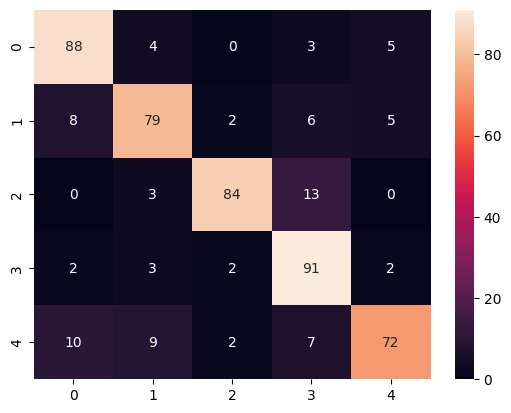

In [22]:
cm = confusion_matrix(y_test , test_predictions)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

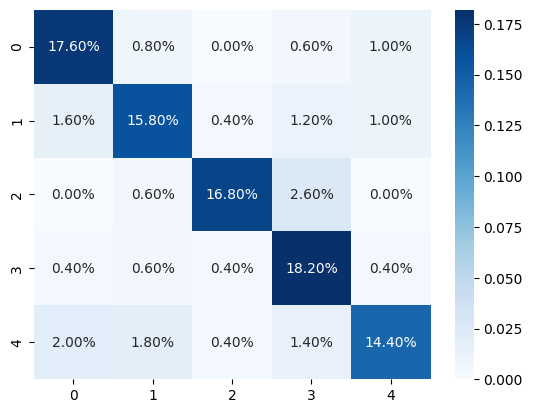

In [23]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Classification Report

In [24]:
cr = classification_report(y_test , test_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.81      0.79      0.80       100
           2       0.93      0.84      0.88       100
           3       0.76      0.91      0.83       100
           4       0.86      0.72      0.78       100

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Display Wrong Classification

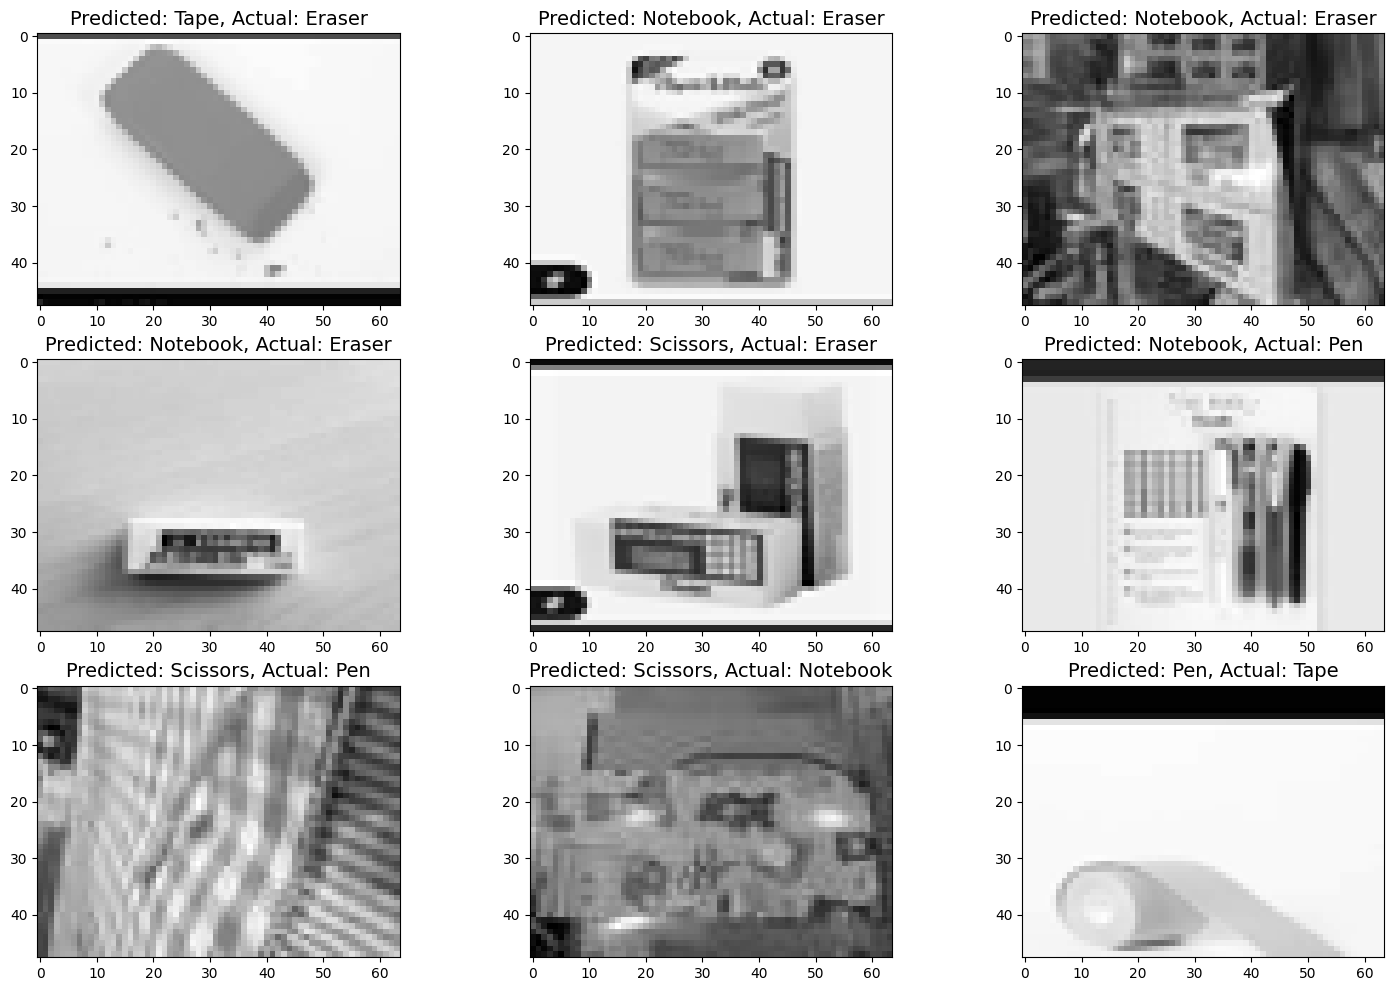

In [25]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test , test_predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index = index+1
#class_name[y_train[0]]
plt.figure(figsize=(18,12))
for plotIndex, wrongIndex in enumerate(misclassifiedIndexes[0:9]):
    plt.subplot(3,3, plotIndex+1)
    plt.imshow(X_test[wrongIndex], cmap='gray')
    plt.title('Predicted: {}, Actual: {}'. format(class_name[test_predictions[wrongIndex]], class_name[y_test[wrongIndex]]), fontsize=14)

### CNN Model 2 - with extra layer of conv2D and max pooling and set dropouts = 0.4

In [15]:
model = tf.keras.Sequential()

# (neurons, kernel, )
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,64,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #Convert our 3D feature maps into 1D feature vectors

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # change here

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # change here

# output layer
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 8, 256)        

In [41]:
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_val, y_val))

Epoch 1/15
125/125 [==============================] - 15s 121ms/step - loss: 1.6107 - accuracy: 0.2017 - val_loss: 1.6026 - val_accuracy: 0.3220
Epoch 2/15
125/125 [==============================] - 15s 121ms/step - loss: 1.5708 - accuracy: 0.2812 - val_loss: 1.4805 - val_accuracy: 0.4140
Epoch 3/15
125/125 [==============================] - 16s 128ms/step - loss: 1.3408 - accuracy: 0.4568 - val_loss: 1.1819 - val_accuracy: 0.5400
Epoch 4/15
125/125 [==============================] - 17s 138ms/step - loss: 1.1463 - accuracy: 0.5555 - val_loss: 0.9830 - val_accuracy: 0.6520
Epoch 5/15
125/125 [==============================] - 19s 152ms/step - loss: 1.0154 - accuracy: 0.6118 - val_loss: 0.8782 - val_accuracy: 0.6840
Epoch 6/15
125/125 [==============================] - 17s 138ms/step - loss: 0.8616 - accuracy: 0.6690 - val_loss: 0.7576 - val_accuracy: 0.7100
Epoch 7/15
125/125 [==============================] - 17s 139ms/step - loss: 0.7546 - accuracy: 0.7130 - val_loss: 0.6334 - val_ac

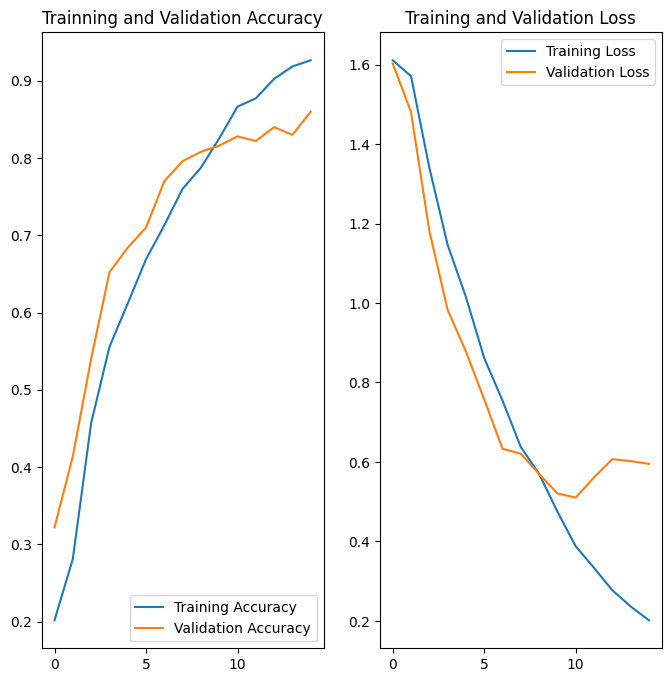

In [42]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(15) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [43]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 0s 29ms/step - loss: 0.6886 - accuracy: 0.8200


[0.6885523796081543, 0.8199999928474426]

<AxesSubplot: >

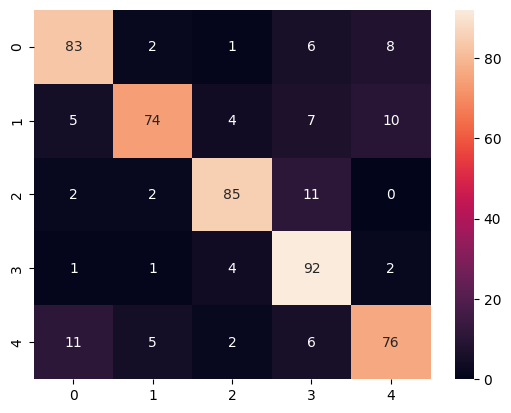

In [44]:
test_predictions_ = model.predict(X_test)
test_predictions = np.argmax(test_predictions_, axis=1)

cm = confusion_matrix(y_test , test_predictions)
sns.heatmap(cm, annot=True)

In [45]:
cr = classification_report(y_test , test_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.88      0.74      0.80       100
           2       0.89      0.85      0.87       100
           3       0.75      0.92      0.83       100
           4       0.79      0.76      0.78       100

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



Train with epoch=9

In [16]:
hist=model.fit(X_train,y_train,epochs=9,validation_data=(X_val, y_val))

Epoch 1/9
125/125 [==============================] - 18s 142ms/step - loss: 1.6123 - accuracy: 0.1908 - val_loss: 1.6066 - val_accuracy: 0.2040
Epoch 2/9
125/125 [==============================] - 18s 140ms/step - loss: 1.5926 - accuracy: 0.2488 - val_loss: 1.5138 - val_accuracy: 0.3000
Epoch 3/9
125/125 [==============================] - 18s 141ms/step - loss: 1.3973 - accuracy: 0.4135 - val_loss: 1.2588 - val_accuracy: 0.5040
Epoch 4/9
125/125 [==============================] - 16s 126ms/step - loss: 1.2270 - accuracy: 0.4960 - val_loss: 1.1210 - val_accuracy: 0.5280
Epoch 5/9
125/125 [==============================] - 16s 126ms/step - loss: 1.0551 - accuracy: 0.5815 - val_loss: 0.9654 - val_accuracy: 0.6580
Epoch 6/9
125/125 [==============================] - 16s 129ms/step - loss: 0.9436 - accuracy: 0.6273 - val_loss: 0.7949 - val_accuracy: 0.7080
Epoch 7/9
125/125 [==============================] - 16s 132ms/step - loss: 0.8146 - accuracy: 0.6963 - val_loss: 0.7866 - val_accuracy:

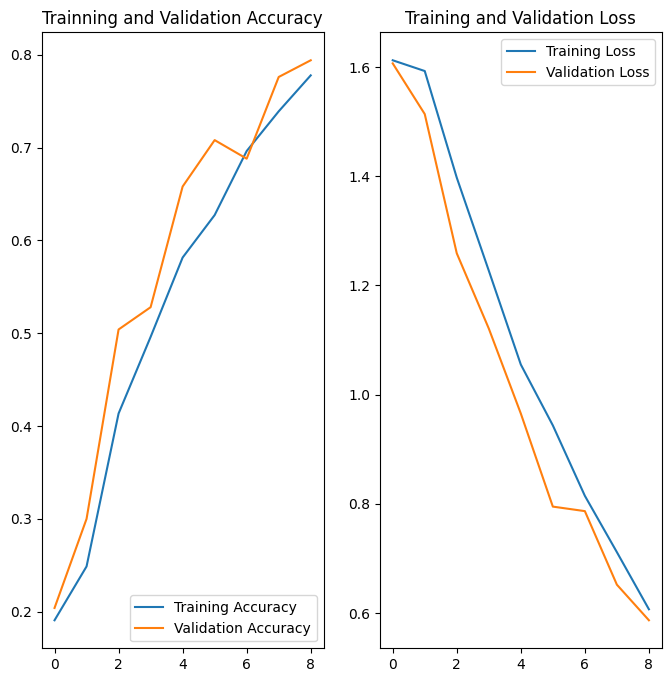

In [17]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(9) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [18]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 1s 31ms/step - loss: 0.6187 - accuracy: 0.7820


[0.6186500191688538, 0.7820000052452087]

<AxesSubplot: >

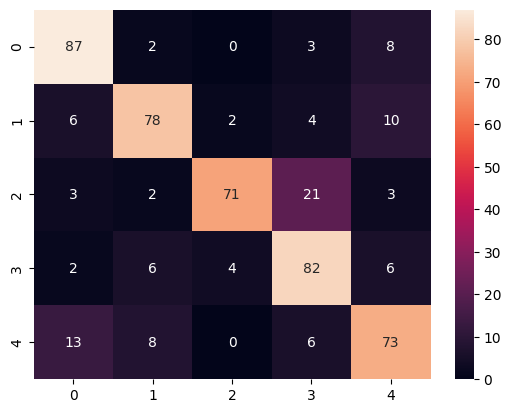

In [19]:
test_predictions_ = model.predict(X_test)
test_predictions = np.argmax(test_predictions_, axis=1)

cm = confusion_matrix(y_test , test_predictions)
sns.heatmap(cm, annot=True)

In [20]:
cr = classification_report(y_test , test_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.81      0.78      0.80       100
           2       0.92      0.71      0.80       100
           3       0.71      0.82      0.76       100
           4       0.73      0.73      0.73       100

    accuracy                           0.78       500
   macro avg       0.79      0.78      0.78       500
weighted avg       0.79      0.78      0.78       500



### CNN Model 3 - Proposed Architecture --> remove last layer of conv2D and max pooling, set dropouts=0.3

In [21]:
model = tf.keras.Sequential()

# (neurons, kernel, )
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,64,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #Convert our 3D feature maps into 1D feature vectors

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])



In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 64, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6144)             

In [35]:
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_val, y_val))

Epoch 1/15
125/125 [==============================] - 14s 115ms/step - loss: 1.5977 - accuracy: 0.2280 - val_loss: 1.5013 - val_accuracy: 0.3560
Epoch 2/15
125/125 [==============================] - 13s 105ms/step - loss: 1.3971 - accuracy: 0.4120 - val_loss: 1.1704 - val_accuracy: 0.5580
Epoch 3/15
125/125 [==============================] - 13s 106ms/step - loss: 1.1330 - accuracy: 0.5512 - val_loss: 0.8670 - val_accuracy: 0.6720
Epoch 4/15
125/125 [==============================] - 13s 107ms/step - loss: 0.9304 - accuracy: 0.6490 - val_loss: 0.7665 - val_accuracy: 0.7220
Epoch 5/15
125/125 [==============================] - 14s 110ms/step - loss: 0.7873 - accuracy: 0.7035 - val_loss: 0.6474 - val_accuracy: 0.7740
Epoch 6/15
125/125 [==============================] - 16s 128ms/step - loss: 0.6493 - accuracy: 0.7640 - val_loss: 0.5994 - val_accuracy: 0.7940
Epoch 7/15
125/125 [==============================] - 16s 127ms/step - loss: 0.5731 - accuracy: 0.7912 - val_loss: 0.5606 - val_ac

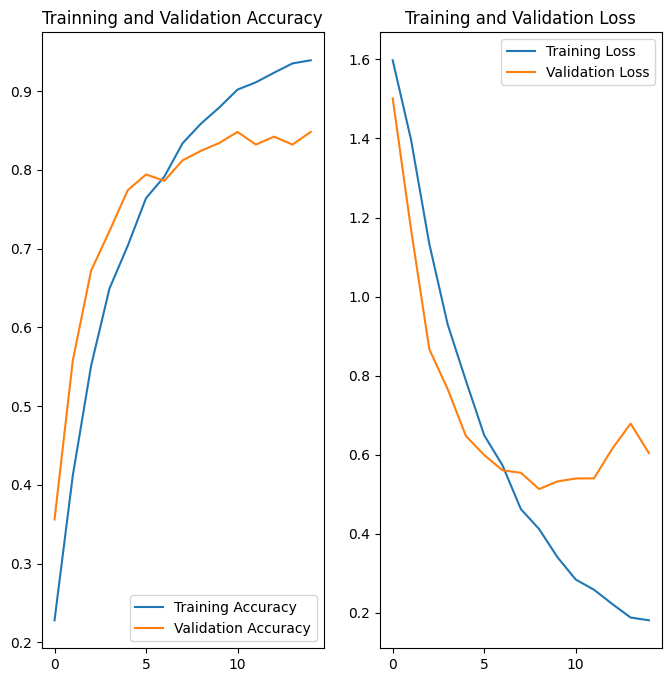

In [36]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(15) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [37]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 0s 21ms/step - loss: 0.6913 - accuracy: 0.8280


[0.6913479566574097, 0.828000009059906]

Train with epoch-9

In [23]:
hist=model.fit(X_train,y_train,epochs=9,validation_data=(X_val, y_val))

Epoch 1/9
125/125 [==============================] - 10s 77ms/step - loss: 1.5465 - accuracy: 0.3065 - val_loss: 1.3008 - val_accuracy: 0.4840
Epoch 2/9
125/125 [==============================] - 11s 89ms/step - loss: 1.2573 - accuracy: 0.5073 - val_loss: 0.9896 - val_accuracy: 0.6160
Epoch 3/9
125/125 [==============================] - 13s 103ms/step - loss: 1.0537 - accuracy: 0.5990 - val_loss: 0.8270 - val_accuracy: 0.7020
Epoch 4/9
125/125 [==============================] - 13s 102ms/step - loss: 0.8517 - accuracy: 0.6873 - val_loss: 0.6910 - val_accuracy: 0.7480
Epoch 5/9
125/125 [==============================] - 12s 94ms/step - loss: 0.7022 - accuracy: 0.7395 - val_loss: 0.6028 - val_accuracy: 0.8000
Epoch 6/9
125/125 [==============================] - 12s 93ms/step - loss: 0.5687 - accuracy: 0.7958 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 7/9
125/125 [==============================] - 12s 93ms/step - loss: 0.4828 - accuracy: 0.8202 - val_loss: 0.5958 - val_accuracy: 0.81

Text(0.5, 1.0, 'Training and Validation Loss')

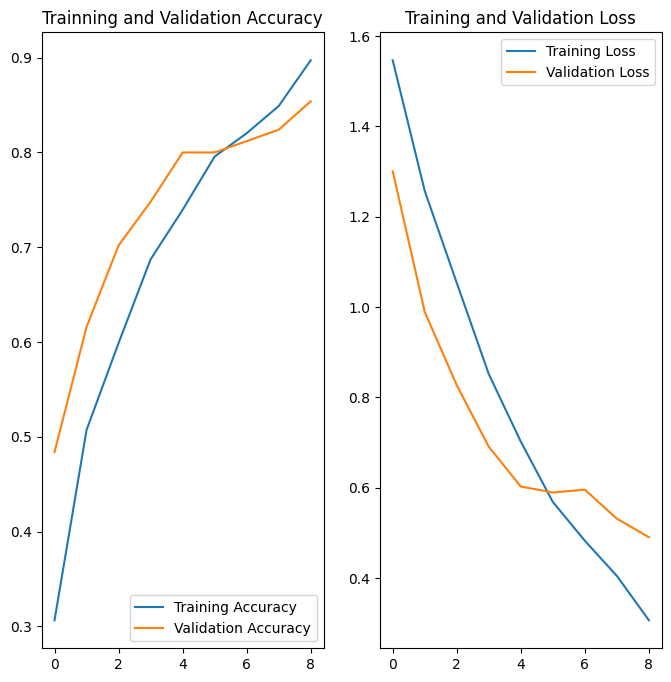

In [24]:
## add xlabel and ylabel
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(9) #number of epochs

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Trainning and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")


In [26]:
score = model.evaluate(X_test,y_test)
score

16/16 [==============================] - 0s 22ms/step - loss: 0.5274 - accuracy: 0.8480


[0.5273537039756775, 0.8479999899864197]

Confusion Matrix

<AxesSubplot: >

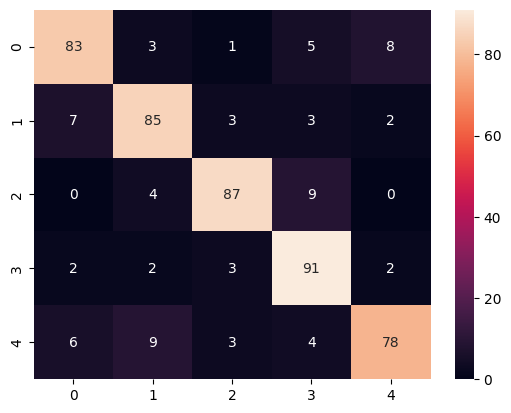

In [29]:
test_predictions_ = model.predict(X_test)
test_predictions = np.argmax(test_predictions_, axis=1)

cm = confusion_matrix(y_test , test_predictions)
sns.heatmap(cm, annot=True)

<AxesSubplot: >

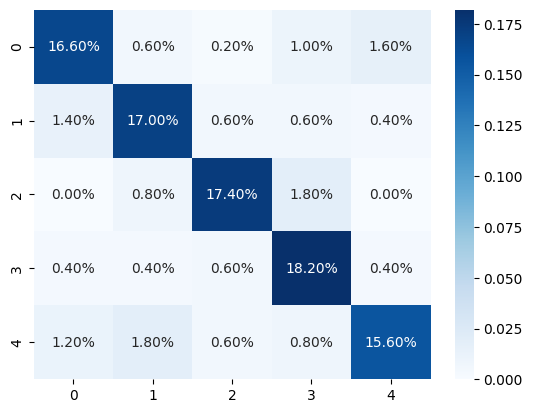

In [30]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Classification Report

In [28]:
cr = classification_report(y_test , test_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.83      0.85      0.84       100
           2       0.90      0.87      0.88       100
           3       0.81      0.91      0.86       100
           4       0.87      0.78      0.82       100

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



Display Wrong Classification

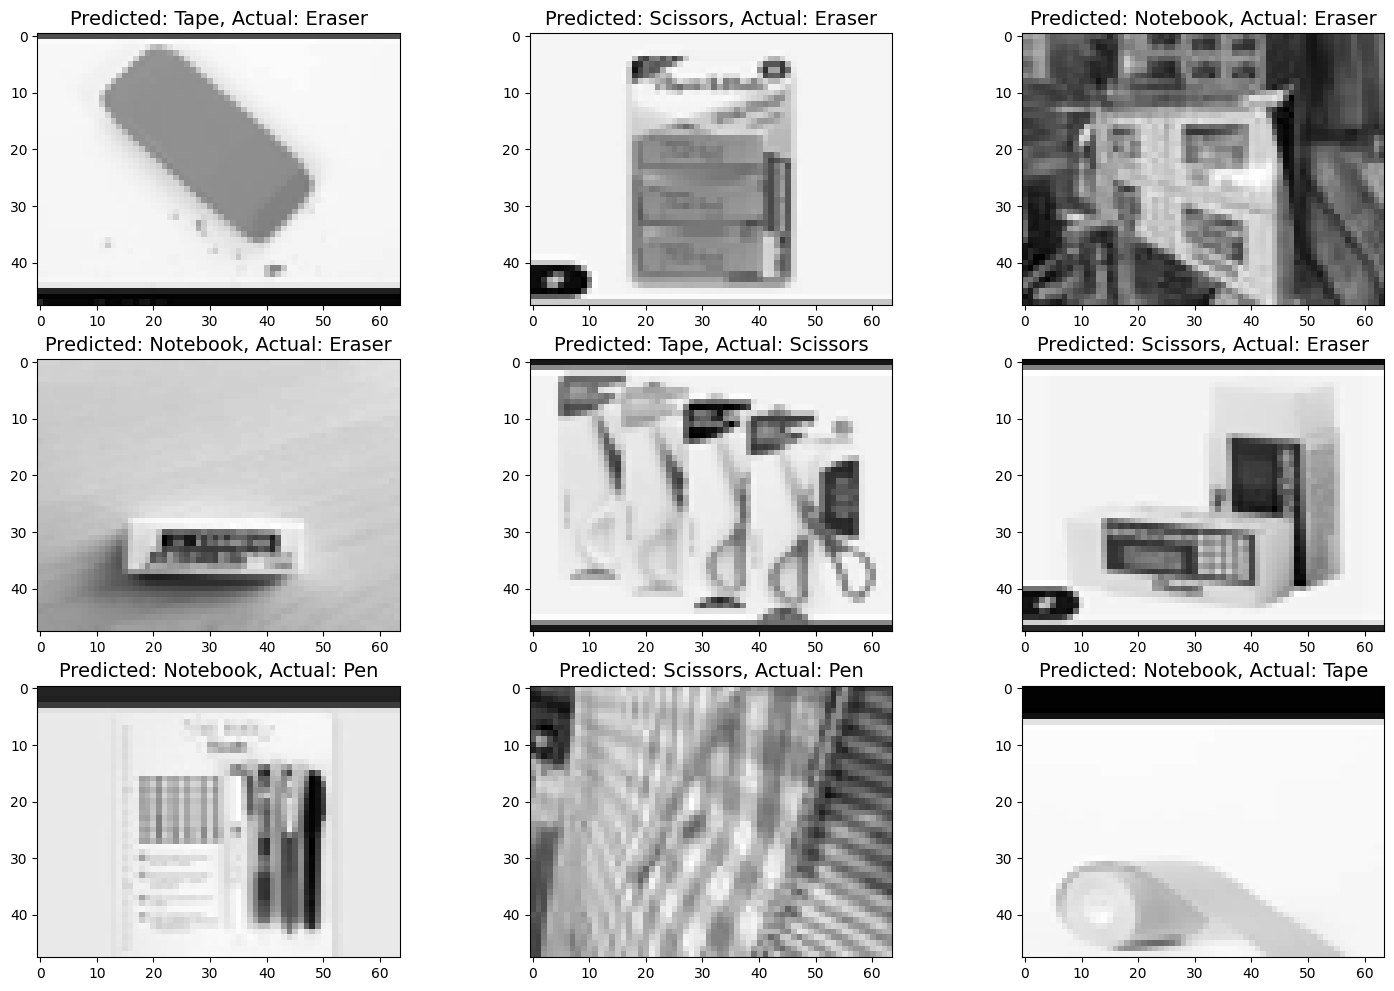

In [31]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test , test_predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index = index+1
#class_name[y_train[0]]
plt.figure(figsize=(18,12))
for plotIndex, wrongIndex in enumerate(misclassifiedIndexes[0:9]):
    plt.subplot(3,3, plotIndex+1)
    plt.imshow(X_test[wrongIndex], cmap='gray')
    plt.title('Predicted: {}, Actual: {}'. format(class_name[test_predictions[wrongIndex]], class_name[y_test[wrongIndex]]), fontsize=14)